In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.label_extract import read_extracted_labels, labels_to_df, labels_to_simple_df, df_labels_to_point_list
from defs.storage_locs import extracted_image_path, extracted_label_path
from court_segment.plot_court_labels import plot_labels
from tools.visualization import plot_image

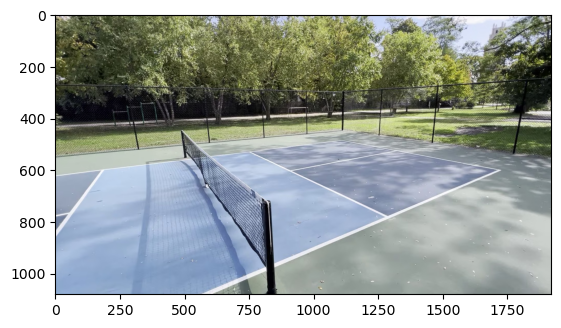

In [28]:
sample_img = cv2.imread(extracted_image_path('center_right_1', 0))
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)

In [29]:
from tools.data_loading import POINT_LABELS
sample_labels = read_extracted_labels(extracted_label_path('center_right_1'))
sample_np = labels_to_simple_df(sample_labels)
# '0'][POINT_LABELS])
X = sample_img
y = sample_np[sample_np.index == '0'][POINT_LABELS]

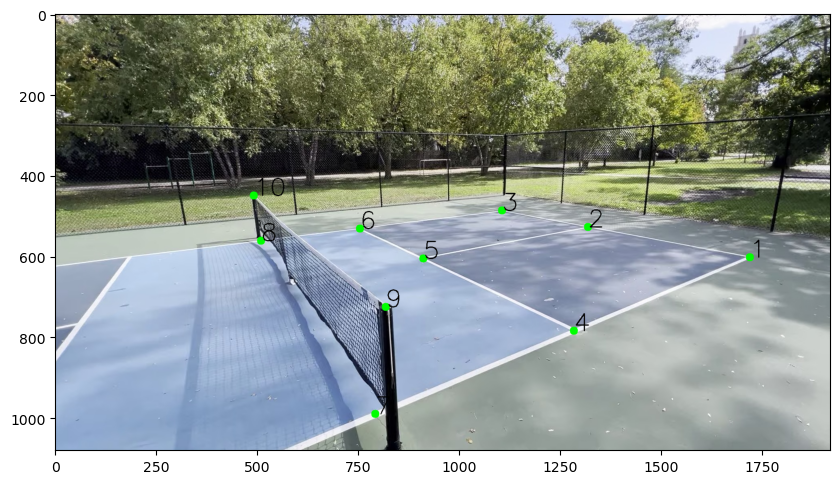

In [30]:
def group_points_by_2(points):
    # create list of points grouped by 2
    grouped_points = []
    for i in range(0, len(points), 2):
        grouped_points.append(points[i:i+2])
    return grouped_points
labels = group_points_by_2(y.values[0])
plot_image(plot_labels(X, labels))

# Translating
move the image and move the labels accordingly

In [31]:
y

1_x     1_y      2_x     2_y     3_x     3_y      4_x    4_y     5_x  \
0  1721.35  602.89  1320.23  527.85  1107.6  486.68  1285.09  784.6  912.77   

      5_y    6_x     6_y     7_x     7_y    8_x     8_y     9_x     9_y  \
0  605.98  755.9  531.67  793.75  990.55  510.1  561.47  819.12  725.25   

     10_x    10_y  
0  492.17  449.73

In [32]:
labels

[array([1721.35, 602.89], dtype=object),
 array([1320.23, 527.85], dtype=object),
 array([1107.6, 486.68], dtype=object),
 array([1285.09, 784.6], dtype=object),
 array([912.77, 605.98], dtype=object),
 array([755.9, 531.67], dtype=object),
 array([793.75, 990.55], dtype=object),
 array([510.1, 561.47], dtype=object),
 array([819.12, 725.25], dtype=object),
 array([492.17, 449.73], dtype=object)]

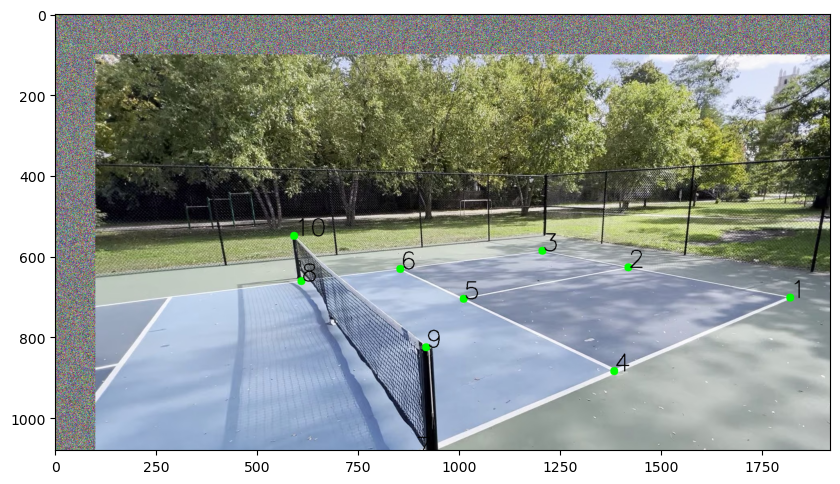

In [33]:
dx = 100
dy = 100
# Translate X
M = np.float32([[1,0,dx],[0,1,dy]])
rows, cols, _ = X.shape
X_translated = cv2.warpAffine(X,M,(cols,rows))
# fill in the empty space created from shifting with random noise
white = np.ones((rows, cols, 3), dtype=np.uint8) * 1
mask = 1 - cv2.warpAffine(white,M,(cols,rows))
# generate random noise for the mask
noise = mask * np.random.randint(0, 255, (rows, cols, 3))
X_translated = X_translated + noise

# Translate y by dx, dy by applying perspective transform
y_labels = group_points_by_2(y.values[0])
new_labels = []
for l in y_labels:
    # convert to vector to multiply
    l = np.array(l)
    l = np.append(l, 1)
    l = M @ l.T
    # convert back to list
    l = l.tolist()
    new_labels.append(l)
y_translated = new_labels

# y_translated
plot_image(plot_labels(X_translated, y_translated))

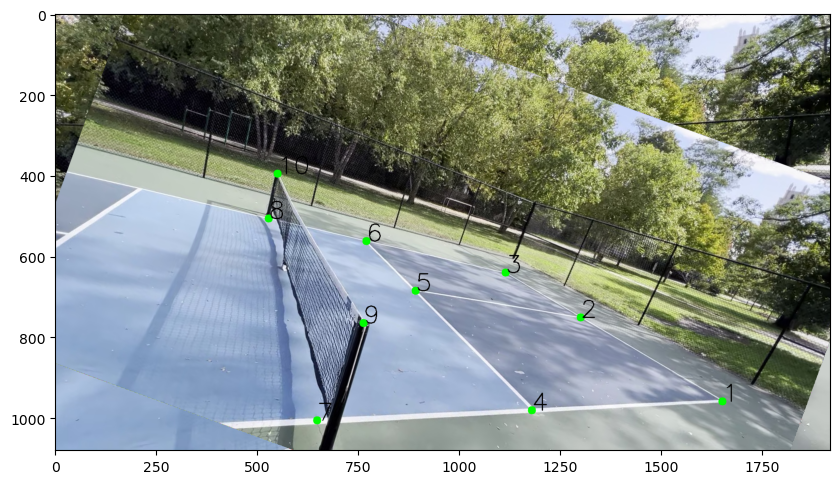

In [34]:
# now do it with rotation of angle theta
theta = 20
theta = theta/180*np.pi
rows, cols, _ = X.shape
dx = 0
dy = 100
# compute adjustment to center image after rotation
center_dx = (cols/2) * (1 - np.cos(theta)) + (rows/2) * np.sin(theta)
center_dy = (rows/2) * (1 - np.cos(theta)) - (cols/2) * np.sin(theta)
dx = dx + center_dx
dy = dy + center_dy
M = np.float32([[np.cos(theta),-np.sin(theta),dx],[np.sin(theta),np.cos(theta),dy]])
X_translated = cv2.warpAffine(X,M,(cols,rows))
# fill in the empty space created from shifting with random noise
white = np.ones((rows, cols, 3), dtype=np.uint8) * 1
mask = 1 - cv2.warpAffine(white,M,(cols,rows))
# generate random noise for the mask
noise = mask * np.random.randint(0, 255, (rows, cols, 3))
X_translated = X_translated + X * mask

# Translate y by dx, dy by applying perspective transform
y_labels = group_points_by_2(y.values[0])
new_labels = []
for l in y_labels:
    # convert to vector to multiply
    l = np.array(l)
    l = np.append(l, 1)
    l = M @ l.T
    # convert back to list
    l = l.tolist()
    new_labels.append(l)
y_translated = new_labels

# y_translated
plot_image(plot_labels(X_translated, y_translated))

# Test Code


In [35]:
from tools.data_loading import read_data_to_numpy
from tools.augment_images import apply_random_affine
import numpy as np
from court_segment.plot_court_labels import plot_random_labeled_image

In [36]:
(X, y) = read_data_to_numpy('center_left_1')

In [37]:
(X_new, y_new) = apply_random_affine(X, y, 2)

In [38]:
np.concatenate([X,X], axis=0) == X_new

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

In [39]:
X.shape

(98, 1080, 1920, 3)

In [40]:
X_new.shape

(196, 1080, 1920, 3)

In [41]:
X_new, y_new = apply_random_affine(X, y, 1, (-15, 15), ((-20, 20), (-10, 10)))

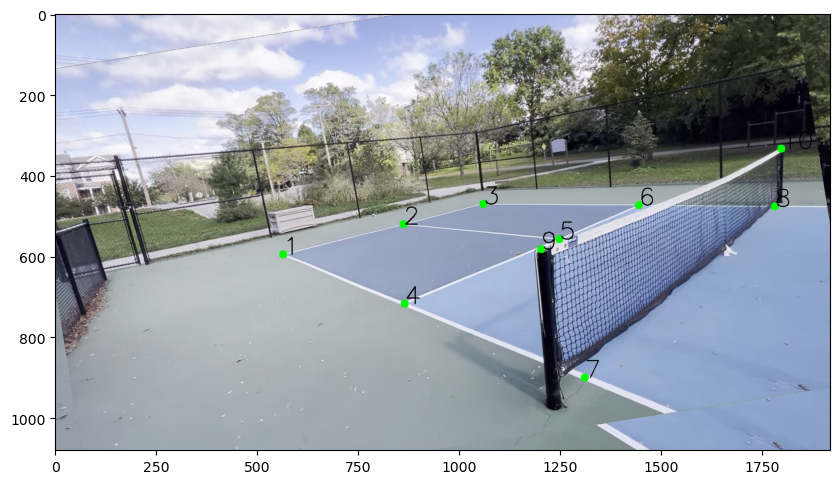

In [42]:
plot_random_labeled_image(X_new, y_new)

In [43]:
from tools.augment_images import apply_random_affine_and_flip

In [44]:
(X_new, y_new) = apply_random_affine_and_flip(X, y, 1, (-20, 20), ((-100, 100), (-50, 50)))

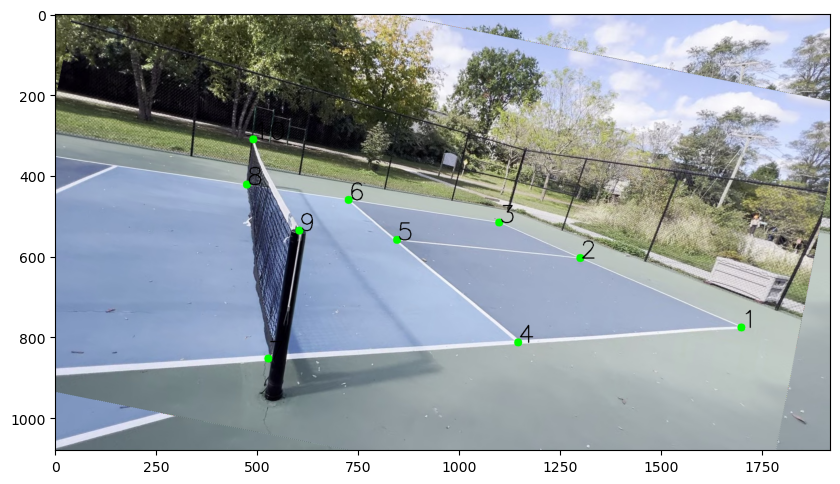

In [45]:
plot_random_labeled_image(X_new, y_new)

In [46]:
import pandas as pd

In [47]:
a = pd.DataFrame(y_new, columns=POINT_LABELS)
a["hello"] = range(len(y_new))
a.to_json('test.json', orient='records')

In [48]:
pd.read_json('test.json', orient='records')

1_x         1_y          2_x         2_y          3_x         3_y  \
0    450.665580  418.466561   811.892227  404.550928  1021.310606  394.497659   
1    285.551470  465.838374   649.869515  428.812149   858.493379  405.022017   
2    337.759815  641.599737   662.612221  474.650539   848.334683  376.685992   
3   1438.416465  381.265829  1077.162445  377.839490   864.773415  373.941414   
4   1526.253558  283.199882  1174.593745  342.153652   963.168094  375.928632   
..          ...         ...          ...         ...          ...         ...   
93   359.817538  270.353106   746.383735  312.784632   963.163821  334.812609   
94  1615.434080  521.863843  1243.997718  398.472068  1038.252606  329.460270   
95   281.778960  380.507224   670.065396  352.927941   887.131998  336.533224   
96   398.573855  302.096128   786.202593  342.830320  1002.888837  363.310099   
97  1508.975392  545.956258  1163.761465  452.322455   959.536581  395.908744   

            4_x         4_y          5_x         5_y  ...         6_y  \
0    787.107520  665.827960  1200.356556  549.490254  ...  495.614889   
1    642.161199  691.553110  1044.373371  547.391285  ...  482.325525   
2    749.433168  720.427261  1074.441295  442.662362  ...  315.700550   
3   1106.743138  637.372973   691.902393  533.938991  ...  486.455332   
4   1245.841973  590.634705   822.969187  563.022752  ...  549.325773   
..          ...         ...          ...         ...  ...         ...   
93   734.285187  656.363832  1159.978587  557.588788  ...  515.951469   
94  1114.033031  717.557355   768.915920  450.687422  ...  338.826012   
95   722.373605  691.010815  1121.169778  519.833762  ...  446.528179   
96   781.421323  678.625577  1202.392966  581.072742  ...  538.911106   
97  1127.858886  714.248170   754.888145  508.593587  ...  412.844413   

            7_x          7_y          8_x         8_y          9_x  \
0   1227.597942   984.778766  1661.451793  574.372982  1229.226209   
1   1095.573869   979.315235  1509.164052  541.345249  1084.926760   
2   1277.870484   825.582118  1504.065665  267.271906  1164.661225   
3    676.456617   968.118563   230.458384  572.232476   662.268983   
4    886.866921   988.989273   371.437024  683.476016   819.457851   
..          ...          ...          ...         ...          ...   
93  1276.885949  1215.493269  1616.275039  651.868780  1439.111585   
94   393.159175   992.266159   312.467107  347.188767   350.613167   
95  1350.587735  1135.261621  1589.068482  530.741795  1467.998985   
96  1332.615474  1220.427425  1659.722425  672.676147  1502.112289   
97   632.892208   926.248139   294.397940  425.225641   690.790625   

           9_y         10_x        10_y  hello  
0   700.262556  1707.707507  450.640722      0  
1   691.648617  1546.282266  415.235644      1  
2   559.126085  1495.904124  137.508591      2  
3   676.694388   176.538752  450.107282      3  
4   708.017838   296.018147  571.446079      4  
..         ...          ...         ...    ...  
93  960.838425  1691.621240  535.530873     93  
94  699.290034   292.138103  210.081909     94  
95  858.987493  1644.636129  400.446618     95  
96  959.444845  1739.475874  553.256661     96  
97  642.649829   281.581726  302.167012     97  

[98 rows x 21 columns]

In [49]:
from tools.data_loading import numpy_to_images_labels

In [50]:
len(X_new)

98

In [51]:
pd.DataFrame(y_new, columns=POINT_LABELS)

1_x         1_y          2_x         2_y          3_x         3_y  \
0    450.665580  418.466561   811.892227  404.550928  1021.310606  394.497659   
1    285.551470  465.838374   649.869515  428.812149   858.493379  405.022017   
2    337.759815  641.599737   662.612221  474.650539   848.334683  376.685992   
3   1438.416465  381.265829  1077.162445  377.839490   864.773415  373.941414   
4   1526.253558  283.199882  1174.593745  342.153652   963.168094  375.928632   
..          ...         ...          ...         ...          ...         ...   
93   359.817538  270.353106   746.383735  312.784632   963.163821  334.812609   
94  1615.434080  521.863843  1243.997718  398.472068  1038.252606  329.460270   
95   281.778960  380.507224   670.065396  352.927941   887.131998  336.533224   
96   398.573855  302.096128   786.202593  342.830320  1002.888837  363.310099   
97  1508.975392  545.956258  1163.761465  452.322455   959.536581  395.908744   

            4_x         4_y          5_x         5_y          6_x         6_y  \
0    787.107520  665.827960  1200.356556  549.490254  1384.506698  495.614889   
1    642.161199  691.553110  1044.373371  547.391285  1227.391684  482.325525   
2    749.433168  720.427261  1074.441295  442.662362  1219.799190  315.700550   
3   1106.743138  637.372973   691.902393  533.938991   505.047961  486.455332   
4   1245.841973  590.634705   822.969187  563.022752   628.072137  549.325773   
..          ...         ...          ...         ...          ...         ...   
93   734.285187  656.363832  1159.978587  557.588788  1336.559895  515.951469   
94  1114.033031  717.557355   768.915920  450.687422   624.314260  338.826012   
95   722.373605  691.010815  1121.169778  519.833762  1288.155641  446.528179   
96   781.421323  678.625577  1202.392966  581.072742  1378.846911  538.911106   
97  1127.858886  714.248170   754.888145  508.593587   583.592864  412.844413   

            7_x          7_y          8_x         8_y          9_x  \
0   1227.597942   984.778766  1661.451793  574.372982  1229.226209   
1   1095.573869   979.315235  1509.164052  541.345249  1084.926760   
2   1277.870484   825.582118  1504.065665  267.271906  1164.661225   
3    676.456617   968.118563   230.458384  572.232476   662.268983   
4    886.866921   988.989273   371.437024  683.476016   819.457851   
..          ...          ...          ...         ...          ...   
93  1276.885949  1215.493269  1616.275039  651.868780  1439.111585   
94   393.159175   992.266159   312.467107  347.188767   350.613167   
95  1350.587735  1135.261621  1589.068482  530.741795  1467.998985   
96  1332.615474  1220.427425  1659.722425  672.676147  1502.112289   
97   632.892208   926.248139   294.397940  425.225641   690.790625   

           9_y         10_x        10_y  
0   700.262556  1707.707507  450.640722  
1   691.648617  1546.282266  415.235644  
2   559.126085  1495.904124  137.508591  
3   676.694388   176.538752  450.107282  
4   708.017838   296.018147  571.446079  
..         ...          ...         ...  
93  960.838425  1691.621240  535.530873  
94  699.290034   292.138103  210.081909  
95  858.987493  1644.636129  400.446618  
96  959.444845  1739.475874  553.256661  
97  642.649829   281.581726  302.167012  

[98 rows x 20 columns]

In [52]:
numpy_to_images_labels(X_new, y_new, 'test')

writing to /mnt/f/SeniorProject/data/custom/test


OSError: Cannot save file into a non-existent directory: '/mnt/f/SeniorProject/data/custom/test'

In [55]:
from defs.storage_locs import custom_label_path, custom_image_path

In [ ]:
labels = pd.read_json(custom_label_path('test'), orient='records')
cv2.imread(custom_image_path('test', 0))

array([[[ 47,  72,  68],
        [ 48,  73,  69],
        [ 47,  72,  68],
        ...,
        [244, 236, 237],
        [244, 236, 237],
        [244, 236, 237]],

       [[ 48,  73,  69],
        [ 48,  73,  69],
        [ 48,  73,  69],
        ...,
        [244, 236, 237],
        [244, 236, 237],
        [244, 236, 237]],

       [[ 46,  71,  67],
        [ 46,  71,  67],
        [ 48,  73,  69],
        ...,
        [244, 236, 237],
        [243, 235, 236],
        [243, 235, 236]],

       ...,

       [[190, 147, 126],
        [190, 147, 126],
        [190, 147, 126],
        ...,
        [171, 164, 155],
        [171, 164, 155],
        [171, 164, 155]],

       [[190, 148, 125],
        [190, 148, 125],
        [190, 148, 125],
        ...,
        [171, 165, 154],
        [171, 165, 154],
        [171, 165, 154]],

       [[190, 148, 125],
        [190, 148, 125],
        [190, 148, 125],
        ...,
        [171, 165, 154],
        [171, 165, 154],
        [171, 165, 154]]

In [53]:
from tools.data_loading import load_numpy_data

In [ ]:
X, y = load_numpy_data(['test'], '480x270', save=False)

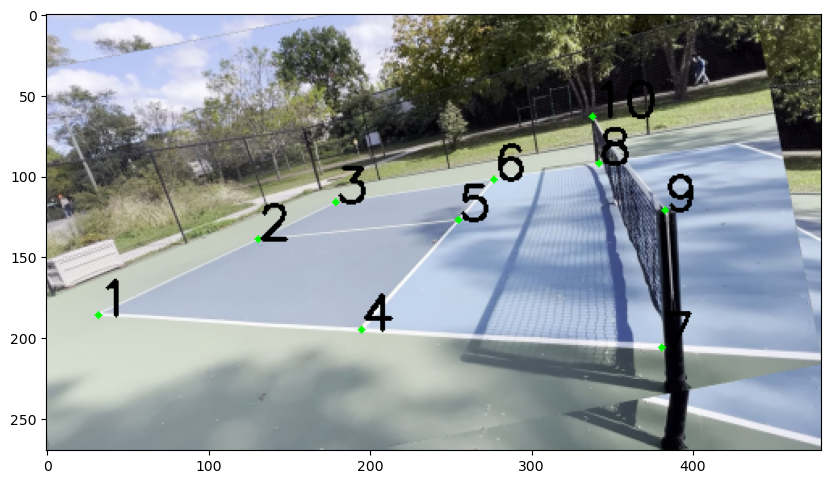

In [ ]:
plot_random_labeled_image(X, y)

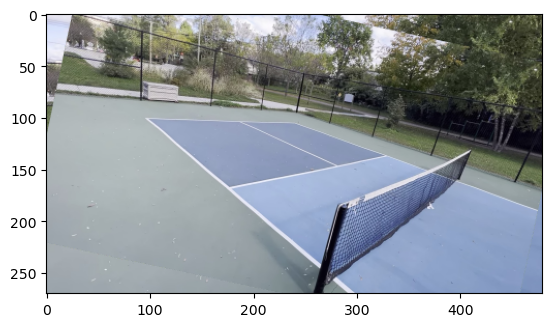

In [ ]:
plt.imshow(X[0])

In [ ]:
X, y = read_data_to_numpy('test', (480, 270), custom=True)

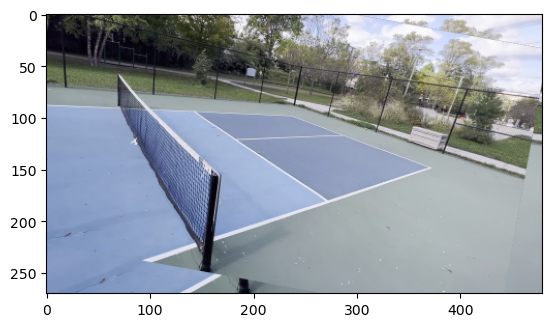

In [ ]:
plt.imshow(X[0])

/mnt/f/SeniorProject/data/custom/center_right_1_flip/center_right_1_flip.json


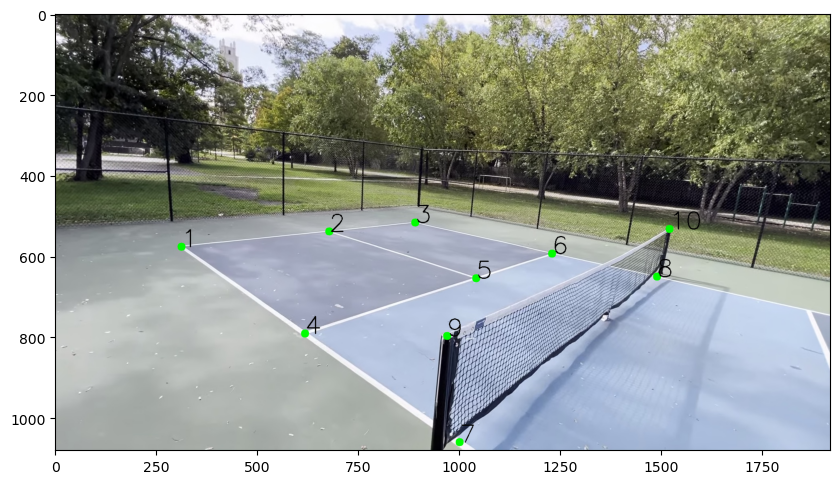

In [56]:
print(custom_label_path('center_right_1_flip'))
X, y = read_data_to_numpy('center_right_1_flip', custom=True)
plot_random_labeled_image(X, y)